In [6]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
titanic = pd.read_csv("train.csv")

In [4]:
print(titanic.head())
print(len(titanic.columns))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
12

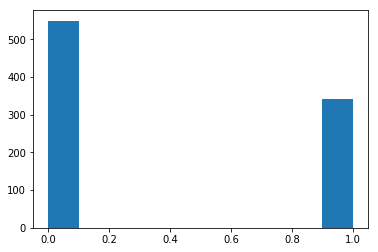

In [7]:
plt.hist(titanic['Survived'])
plt.show()

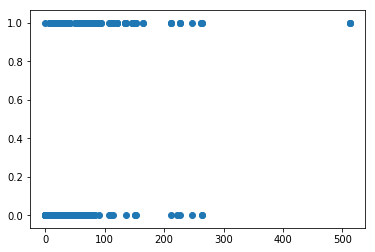

In [9]:
plt.scatter(titanic['Fare'],titanic['Survived'])
plt.show()

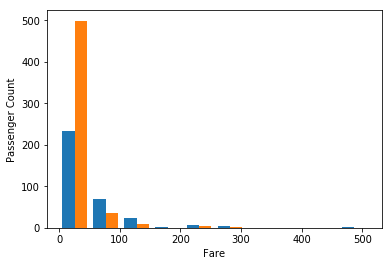

In [10]:
plt.hist([titanic[titanic['Survived']==1]['Fare'],titanic[titanic['Survived']==0]['Fare']],label=titanic['Survived'])
plt.xlabel('Fare')
plt.ylabel('Passenger Count')
plt.show()

In [11]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

In [ ]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

In [ ]:
titanic_test = pd.read_csv("test.csv")
titanic_test["Age"] = titanic_test["Age"].fillna(titanic_test["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1

titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [ ]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch","Fare","Embarked"]

In [ ]:
C = 0.7
clf = svm.SVC(kernel='linear',C=C).fit(titanic[features],titanic["Survived"])
prediction = clf.predict(titanic_test[features])


In [ ]:

submission = pd.DataFrame({"PassengerId":titanic_test["PassengerId"],"Survived":prediction})
submission.to_csv("titanic_result.csv", index=False)